## Create trajectory viewer

In [1]:
import pytraj as pt
import nglview as nv
print(pt.__version__, nv.__version__)

2.0.5 3.0.3


In [15]:
print(nv.datafiles.TRR)
print(nv.datafiles.PDB)

/home/dhnchandan/anaconda3/envs/nb_md_analysis/lib/python3.7/site-packages/nglview/datafiles/md_1u19.trr
/home/dhnchandan/anaconda3/envs/nb_md_analysis/lib/python3.7/site-packages/nglview/datafiles/md_1u19.pdb


In [2]:
# create pytraj's Trajectory, require supported formats (.nc, .dcd, .pdb, .trr, ...)
traj = pt.load(nv.datafiles.TRR, nv.datafiles.PDB)

# perform superimpose to 1st frame to remove translation and rotation
traj.superpose(mask='@CA', ref=0)

traj

pytraj.Trajectory, 51 frames: 
Size: 0.006323 (GB)
<Topology: 5547 atoms, 349 residues, 1 mols, PBC with box type = ortho>
           

In [17]:
# create NGL viewer
view = nv.show_pytraj(traj)
view

NGLWidget(max_frame=50)

In [4]:
view.render_image()

Image(value=b'', width='99%')

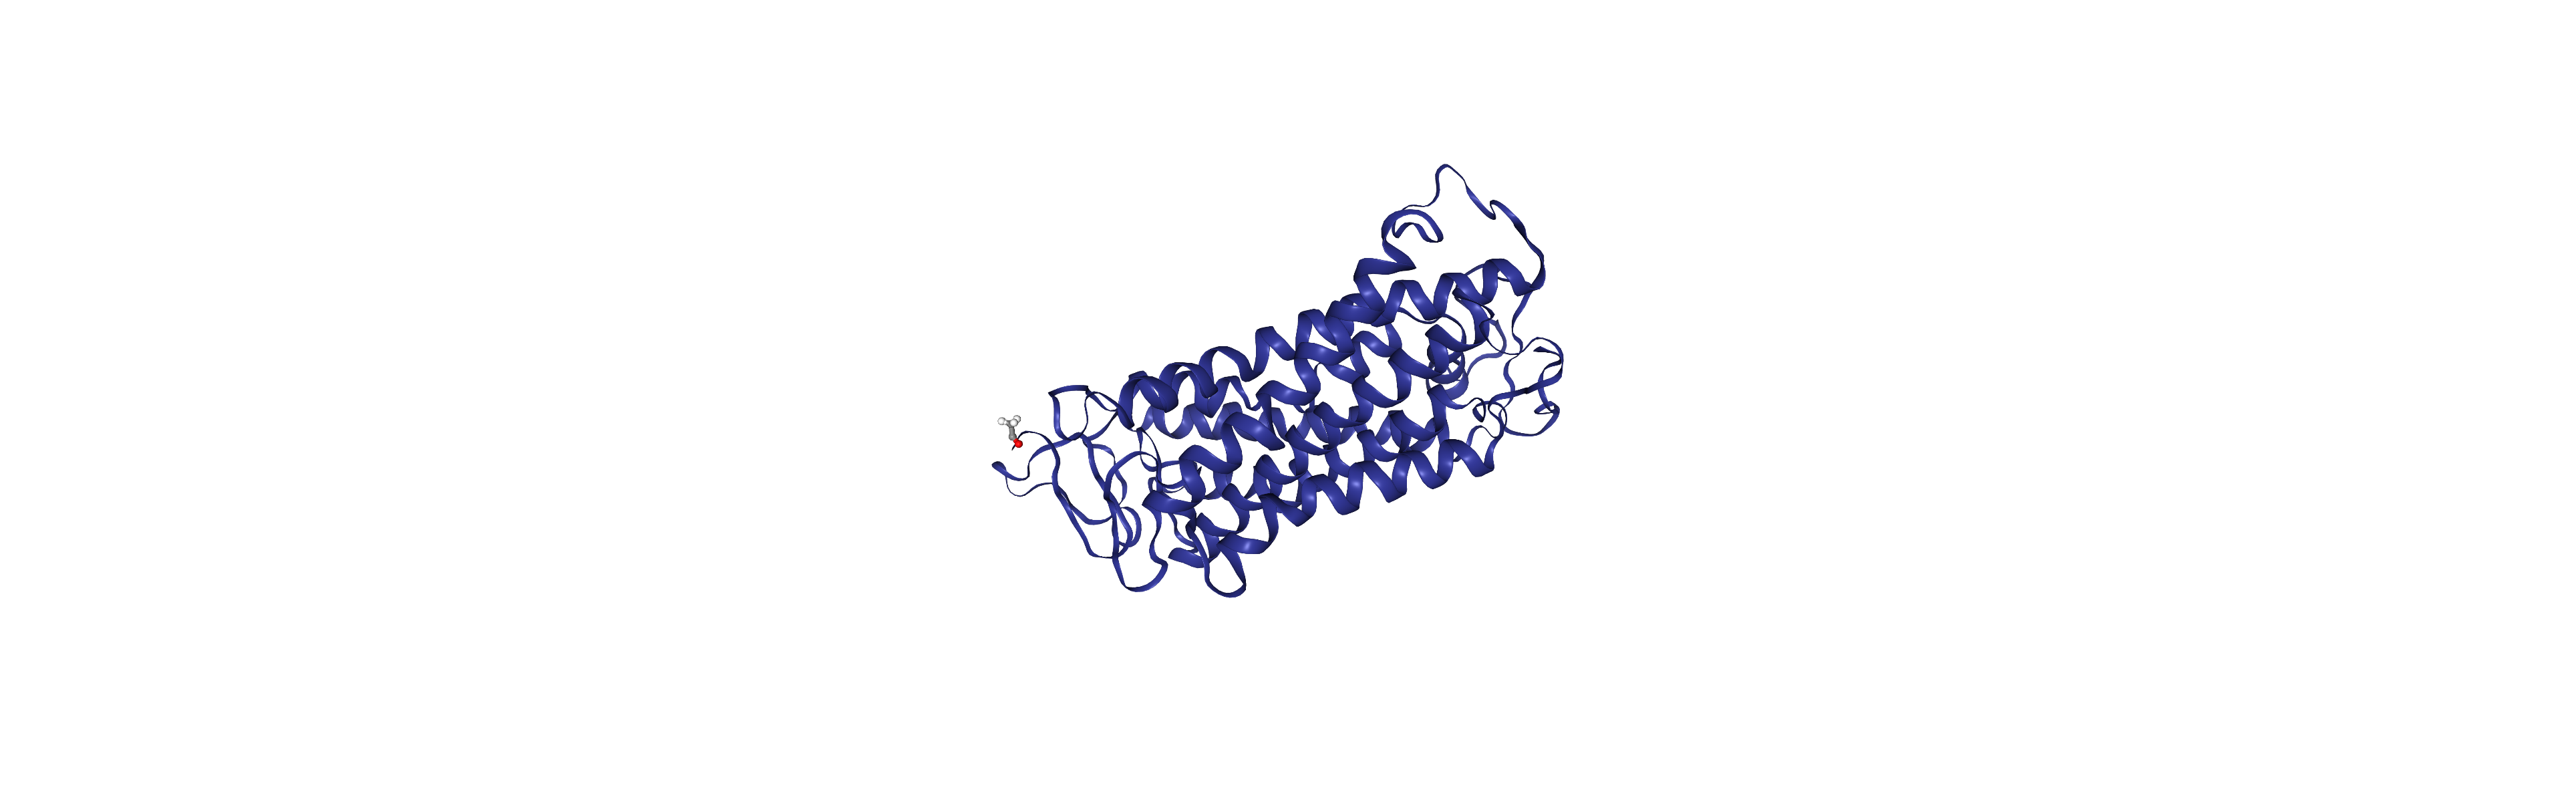

In [5]:
view._display_image()

## Render image for movie

In [11]:
# make sure to change your web browser option to save files as default (vs open file by external program)
# NGLView will render each snapshot and save image to your web browser default download location
# uncomment all the commands below to render

from time import sleep

# to save time for this tutorial, we make a movie with only 50 frames
for frame in range(0, 50):
    # set frame to update coordinates
    view.frame = frame
    # make sure to let NGL spending enough time to update coordinates
    sleep(0.5)
    view.download_image(filename='0image{}.png'.format(frame))
    # make sure to let NGL spending enough time to render before going to next frame
    sleep(2.0)

## Make a movie (gif format)

In [6]:
import moviepy.editor as mpy

In [7]:
# default download folder: /home/dhnchandan/Downloads
template = '/home/dhnchandan/Downloads/0image{}.png'

# get all (sorted) image files
imagefiles = [template.format(str(i)) for i in range(0, 50, 2)]

In [12]:
# make a gif file
frame_per_second = 8
im = mpy.ImageSequenceClip(imagefiles, fps=frame_per_second)
im.write_gif('my_movie.gif', fps=frame_per_second)

MoviePy - Building file my_movie.gif with imageio.


In [13]:
# display the gif in this notebook
from IPython import display

display.HTML("<img src='my_movie.gif'></img>")

In [10]:
from time import gmtime, strftime
strftime("%Y-%m-%d", gmtime())

'2021-11-04'